In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\preprocessing.py'>

In [2]:
df = pd.read_csv("data/forest/covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [4]:
#getting train_set
df1 = df[df['Cover_Type'] == 1].sample(1620)
df2 = df[df['Cover_Type'] == 2].sample(1620)
df3 = df[df['Cover_Type'] == 3].sample(1620)
df4 = df[df['Cover_Type'] == 4].sample(1620)
df5 = df[df['Cover_Type'] == 5].sample(1620)
df6 = df[df['Cover_Type'] == 6].sample(1620)
df7 = df[df['Cover_Type'] == 7].sample(1620)
df_train = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_train['Cover_Type'].value_counts()

7    1620
6    1620
5    1620
4    1620
3    1620
2    1620
1    1620
Name: Cover_Type, dtype: int64

In [5]:
df.shape

(581012, 55)

In [6]:
df = df.drop(df_train.index)

In [7]:
df1 = df[df['Cover_Type'] == 1].sample(540)
df2 = df[df['Cover_Type'] == 2].sample(540)
df3 = df[df['Cover_Type'] == 3].sample(540)
df4 = df[df['Cover_Type'] == 4].sample(540)
df5 = df[df['Cover_Type'] == 5].sample(540)
df6 = df[df['Cover_Type'] == 6].sample(540)
df7 = df[df['Cover_Type'] == 7].sample(540)
df_val = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_val['Cover_Type'].value_counts()

7    540
5    540
3    540
1    540
6    540
4    540
2    540
Name: Cover_Type, dtype: int64

In [8]:
df = df.drop(df_val.index)

In [10]:
print(df.shape)
df_train = df_train.sample(frac=1)
df_val = df_val.sample(frac=1)
df = df.sample(frac=1)

(565892, 55)


In [9]:
X_train, y_train = preprocessing.XySplit(df_train, 'Cover_Type')
X_val, y_val = preprocessing.XySplit(df_val, 'Cover_Type')
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)
X_test, y_test = preprocessing.XySplit(df, 'Cover_Type')

In [11]:
X_train_val.shape

(15120, 54)

In [14]:
clf = svm.SVC(random_state=0, gamma='scale', max_iter=1000)
clf.fit(X_val, y_val)
#mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=1000, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

[[124391  69100    190      0   4314    210  11475]
 [ 56241 187899   9078     64  19434   6516   1909]
 [   115   2546  23341   2210    428   4954      0]
 [     0      2     26    535      0     24      0]
 [    59    585    109      0   6481     99      0]
 [    71    562   2090    747    232  11505      0]
 [  1699   1151      5      0     12      0  15483]]


(array([[124391,  69100,    190,      0,   4314,    210,  11475],
        [ 56241, 187899,   9078,     64,  19434,   6516,   1909],
        [   115,   2546,  23341,   2210,    428,   4954,      0],
        [     0,      2,     26,    535,      0,     24,      0],
        [    59,    585,    109,      0,   6481,     99,      0],
        [    71,    562,   2090,    747,    232,  11505,      0],
        [  1699,   1151,      5,      0,     12,      0,  15483]],
       dtype=int64), 0.6531900079873898)

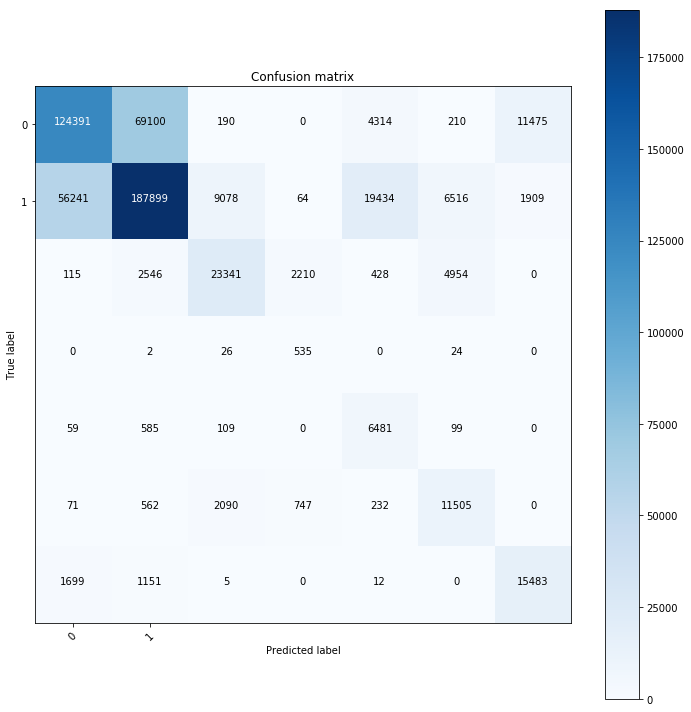

In [15]:
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [41]:
X_full, y_full = preprocessing.XySplit(df, 'Cover_Type')
X_train, X_val, X_test_full, X_train_val, y_train_full, y_val, y_test_full, y_train_val = mlTest.train_val_test_split(X_full, y_full, train_size=.8, val_size=.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
X_test = X_val
y_test = y_val

In [19]:
y.describe()

count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

Initial Performance Testing:

[[134870  49606    416      0   5559   1020  18209]
 [ 62031 170793   6740    186  30174   8324   2893]
 [    20    742  24975   1548    721   5578     10]
 [     0      0     31    540      0     16      0]
 [   171    582    113      0   6384     83      0]
 [    58    374   2387    559    214  11615      0]
 [  1294    198      7      0      5      0  16846]]
0.6468071646179836


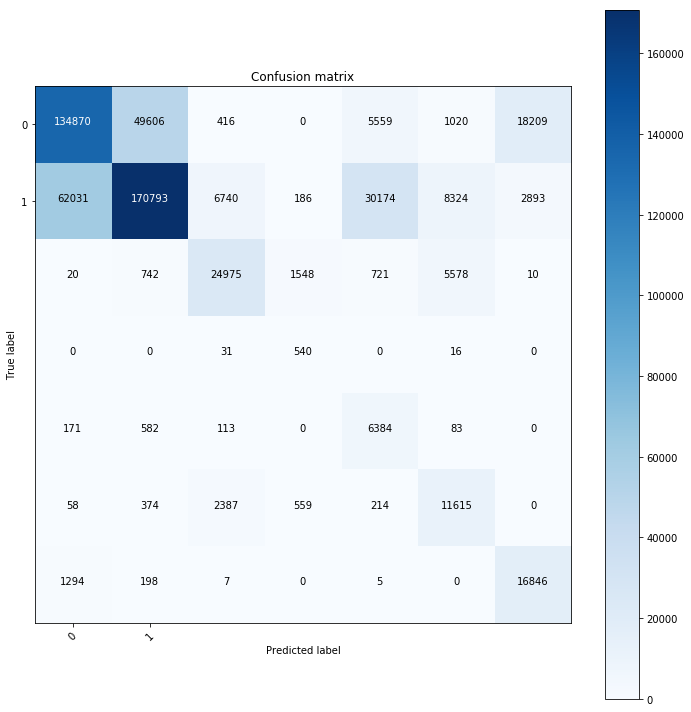

In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[263   6   1   0   8   2  39]
 [191  28  18   0  32  38   7]
 [  0   5 103   0   6 163   0]
 [  0   0  22   0   0 223   0]
 [ 53  47  14   0 141  28   0]
 [  0   6 179   0  10 133   0]
 [241   0   0   0   0   0  68]]


(array([[263,   6,   1,   0,   8,   2,  39],
        [191,  28,  18,   0,  32,  38,   7],
        [  0,   5, 103,   0,   6, 163,   0],
        [  0,   0,  22,   0,   0, 223,   0],
        [ 53,  47,  14,   0, 141,  28,   0],
        [  0,   6, 179,   0,  10, 133,   0],
        [241,   0,   0,   0,   0,   0,  68]], dtype=int64), 0.3546987951807229)

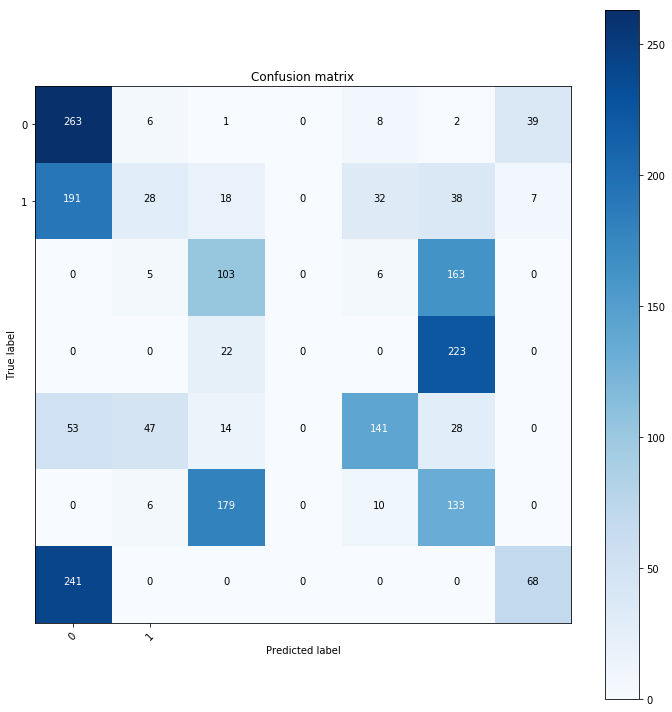

In [11]:
clf = ensemble.AdaBoostClassifier(random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[173 178  17   1   0   2  17]
 [ 68 275 120   2   1   4   1]
 [  0   1  54   0   0   0   1]
 [  0   0   6   0   0   0   0]
 [  1  11  10   0   0   0   0]
 [  0   3  24   0   0   0   0]
 [ 24   2   0   0   0   0   4]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[173, 178,  17,   1,   0,   2,  17],
        [ 68, 275, 120,   2,   1,   4,   1],
        [  0,   1,  54,   0,   0,   0,   1],
        [  0,   0,   6,   0,   0,   0,   0],
        [  1,  11,  10,   0,   0,   0,   0],
        [  0,   3,  24,   0,   0,   0,   0],
        [ 24,   2,   0,   0,   0,   0,   4]], dtype=int64), 0.506)

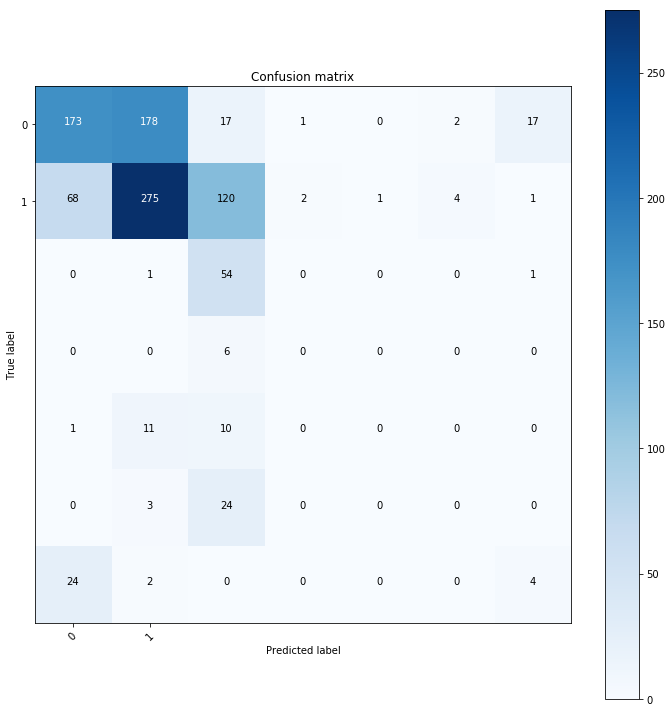

In [20]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1263    1]
 [ 619   19]]


(array([[1263,    1],
        [ 619,   19]], dtype=int64), 0.6740273396424816)

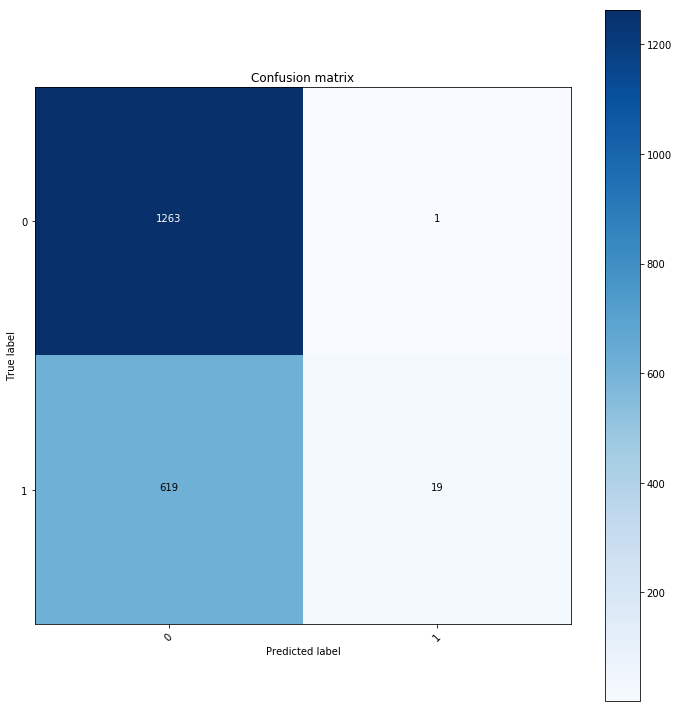

In [27]:
clf = svm.SVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np

model = Sequential()
model.add(Dense(10,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, epochs=200, validation_data=(X_val.values, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/200
15216/15216 [==============================] - 3s 218us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 2/200
15216/15216 [==============================] - 3s 165us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 3/200
 6176/15216 [===========>..................] - ETA: 1s - loss: 5.7468 - acc: 0.0368

KeyboardInterrupt: 

[[1132  132]
 [ 197  441]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[1132,  132],
        [ 197,  441]], dtype=int64), 0.8270241850683491)

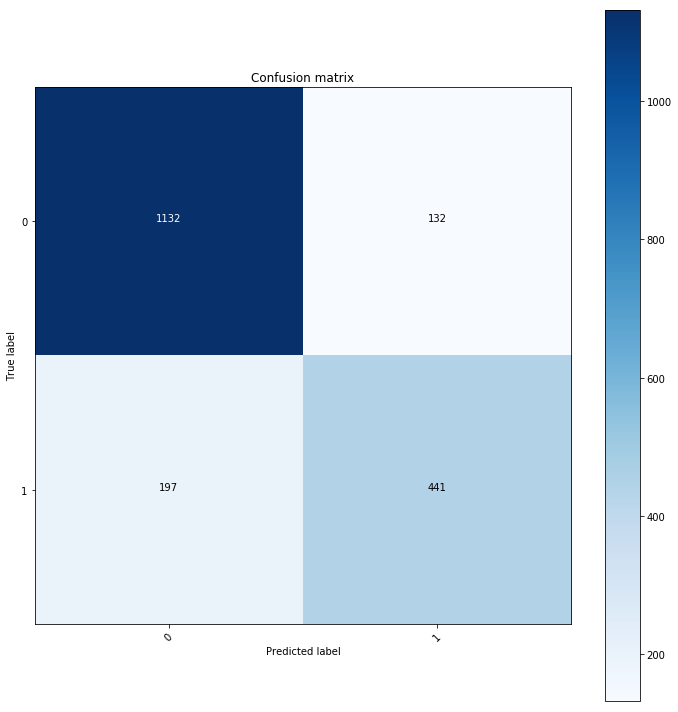

In [30]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Algorithm Testing:

Decision Tree Classifier:
Testing: Pruning parameter min_impurity_decrease
Testing: Max Depth

Processing Param Val: 0.00054444444444444447
0.7990079365079366
0.0001666666666666667


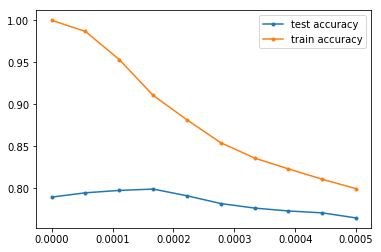

In [20]:
param = ('min_impurity_decrease', np.linspace(0, .0005, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
#mlTest.saveNpArray(train_acc, "COVER-decisionTree", descriptors="impurity-train_acc")
#mlTest.saveNpArray(test_acc, "COVER-decisionTree", descriptors="impurity-test_acc")
#mlTest.saveNpArray(param_vals, "COVER-decisionTree", descriptors="impurity-vals")

Processing Param Val: 20.088888888888899
0.7910714285714285
17.88888888888889


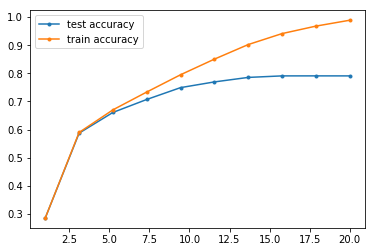

In [22]:
param = ('max_depth', np.linspace(1, 20, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-decisionTree", descriptors="max_depth-train_acc")
mlTest.saveNpArray(test_acc, "COVER-decisionTree", descriptors="max_depth-test_acc")
mlTest.saveNpArray(param_vals, "COVER-decisionTree", descriptors="max_depth-vals")

Min impurity decrease with max depth did not improve performance. So I just left it out.

Processing Param Val: 0.00054444444444444447
0.7960978835978837
5.555555555555556e-05


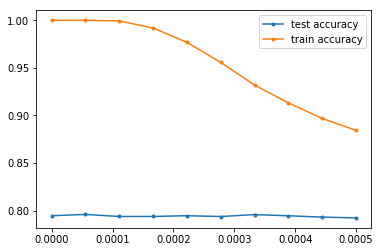

In [24]:
param = ('min_impurity_decrease', np.linspace(0, .001, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-decisionTree", descriptors="impurity-train_acc-entropy")
mlTest.saveNpArray(test_acc, "COVER-decisionTree", descriptors="impurity-test_acc-entropy")
mlTest.saveNpArray(param_vals, "COVER-decisionTree", descriptors="impurity-vals-entropy")

20


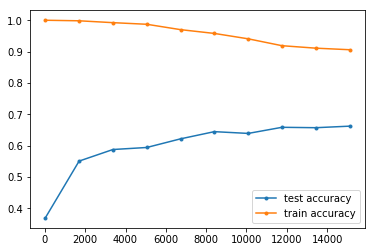

In [15]:
clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.0001666666666666667)
train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, X_val=X_test, y_val=y_test, min_train_num=20, cross_val=False)
mlTest.plot_accuracy(train_acc, test_acc, train_samples)

In [16]:
mlTest.saveNpArray(train_acc, "COVER-decisionTree", descriptors="tuned-train_acc")
mlTest.saveNpArray(test_acc, "COVER-decisionTree", descriptors="tuned-test_acc")
mlTest.saveNpArray(train_samples, "COVER-decisionTree", descriptors="tuned-vals")

[[141882  43752    446      0   5344    658  18138]
 [ 57136 180815   5568     26  27182   8816   2138]
 [    15    583  25499   1845    903   5289      0]
 [     0      0     28   1089      0     10      0]
 [    68    503     58      0   7142     88     14]
 [     6    302   2254    490    301  12394      0]
 [  1205    101      0      0     24      0  17560]]
0.6782516957126206


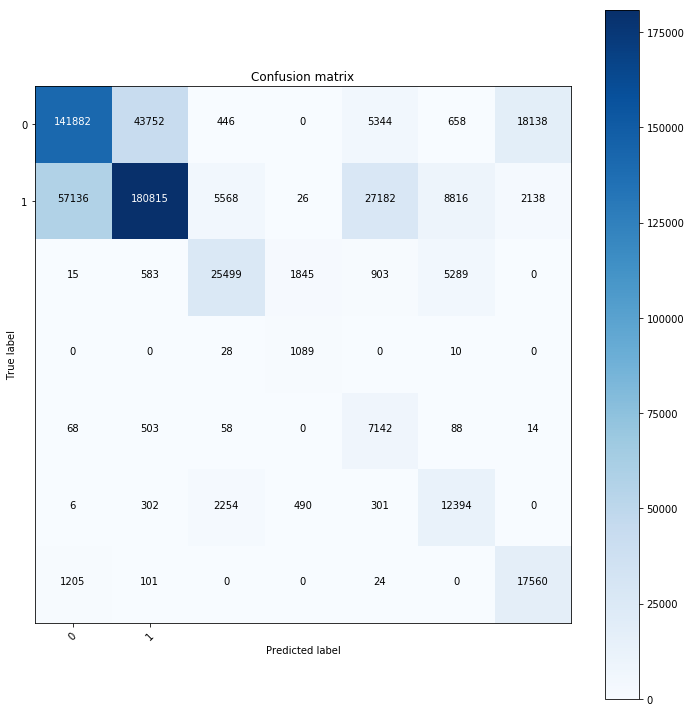

In [43]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.0001666666666666667)
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)
mlTest.saveNpArray(cnf_matrix, "COVER-decisionTree", descriptors="cnf_matrix")

In [40]:
y_ = clf.predict(X_test)
m = metrics.precision_recall_fscore_support(y_test,y_)

In [41]:
m = np.array(m)
print(m.shape)
print(np.array([['hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello']]).shape)

(4, 7)
(1, 7)


In [42]:
m = np.concatenate(([['Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']], m), axis=0)
m = np.array(m).transpose()
from tabulate import tabulate
headers=['Class', 'Precision', 'Recall', 'F1 Score', 'Support']
print(tabulate(m, tablefmt="latex", floatfmt=".3f", headers=headers))

\begin{tabular}{lrrrr}
\hline
 Class             &   Precision &   Recall &   F1 Score &    Support \\
\hline
 Spruce-Fir        &       0.707 &    0.676 &      0.691 & 210220.000 \\
 Lodgepole Pine    &       0.800 &    0.641 &      0.712 & 281681.000 \\
 Ponderosa Pine    &       0.746 &    0.746 &      0.746 &  34134.000 \\
 Cottonwood/Willow &       0.308 &    0.966 &      0.467 &   1127.000 \\
 Aspen             &       0.176 &    0.907 &      0.295 &   7873.000 \\
 Douglas-fir       &       0.461 &    0.785 &      0.581 &  15747.000 \\
 Krummholz         &       0.463 &    0.929 &      0.618 &  18890.000 \\
\hline
\end{tabular}


In [30]:
m

array([['hello', '0.707437646238861', '0.6759727904100467',
        '0.691347393514802', '210220.0'],
       ['hello', '0.7999752006093565', '0.6413070104124878',
        '0.7119073563576247', '281681.0'],
       ['hello', '0.7459945520049208', '0.746147536180934',
        '0.7460710362504577', '34134.0'],
       ['hello', '0.3081494057724958', '0.966282165039929',
        '0.467281699206179', '1127.0'],
       ['hello', '0.17604731394775752', '0.9074050552521276',
        '0.2948837017315749', '7873.0'],
       ['hello', '0.46069006632386916', '0.785165428335556',
        '0.5806739462251967', '15747.0'],
       ['hello', '0.46328205398844235', '0.929433562731604',
        '0.6183457481465828', '18890.0']], dtype='<U32')

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
trace = go.Table(
    header=dict(values=['A Scores', 'B Scores']),
    cells=dict(values=[[100, 90, 80, 90],
                       [95, 85, 75, 95]]))

data = [trace] 
plotly.offline.plot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
}, auto_open=True)

'file://C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\temp-plot.html'

ADA BOOST TESTING
Testing: n_estimators
learning rate?

0.6661375661375661
1000


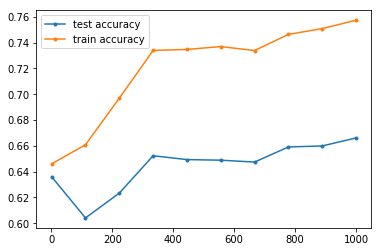

In [49]:
#param = ('n_estimators', np.linspace(1, 1000, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=4), random_state=0)
#train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc4))
print(param_vals4[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)
mlTest.saveNpArray(train_acc4, "COVER-adaboost", descriptors="n_estimators-train_acc-depth4-more")
mlTest.saveNpArray(test_acc4, "COVER-adaboost", descriptors="n_estimators-test_acc-depth4-more")
mlTest.saveNpArray(param_vals4, "COVER-adaboost", descriptors="n_estimators-vals-depth4-more")

Processing Param Val: 2000
0.40542328042328046


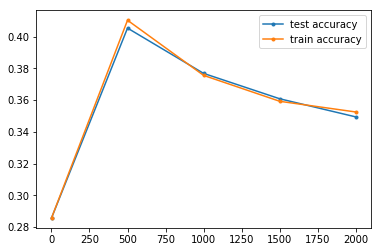

In [52]:
param = ('n_estimators', np.linspace(1, 2000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.1)
train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc4))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)

In [ ]:
param = ('n_estimators', np.linspace(1, 500, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.01)
train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)

In [ ]:
param = ('n_estimators', np.linspace(1, 500, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.001)
train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)

In [ ]:
param = ('n_estimators', np.linspace(1, 500, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.0001)
train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)

Processing Param Val: 80
0.4393518518518518
9


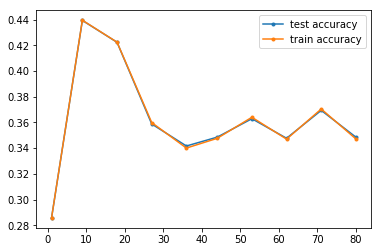

In [39]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-ADABoost", descriptors="n_estimators-train_acc")
mlTest.saveNpArray(test_acc, "COVER-ADABoost", descriptors="n_estimators-test_acc")
mlTest.saveNpArray(param_vals, "COVER-ADABoost", descriptors="n_estimators-vals")

Processing Param Val: 80
0.4393518518518518
9


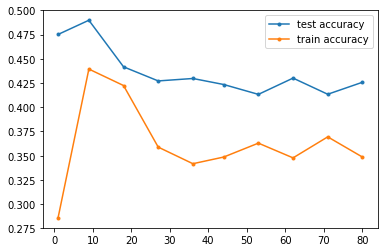

In [40]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc1, test_acc1, param_vals1 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
mlTest.saveNpArray(train_acc1, "COVER-adaboost", descriptors="n_estimators-train_acc-depth2")
mlTest.saveNpArray(test_acc1, "COVER-adaboost", descriptors="n_estimators-test_acc-depth2")
mlTest.saveNpArray(param_vals1, "COVER-adaboost", descriptors="n_estimators-vals-depth2")

Processing Param Val: 80
0.5873677248677248
1


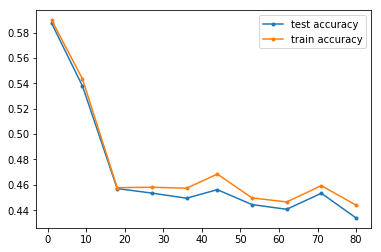

In [41]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=3), random_state=0)
train_acc3, test_acc3, param_vals3 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc3))
print(param_vals3[np.argmax(test_acc3)])
mlTest.plot_accuracy(train_acc3, test_acc3, param_vals3)
mlTest.saveNpArray(train_acc3, "COVER-adaboost", descriptors="learning_rate-train_acc-depth3")
mlTest.saveNpArray(test_acc3, "COVER-adaboost", descriptors="learning_rate-test_acc-depth3")
mlTest.saveNpArray(param_vals3, "COVER-adaboost", descriptors="learning_rate-vals-depth3")

Processing Param Val: 80
0.6421957671957672
1


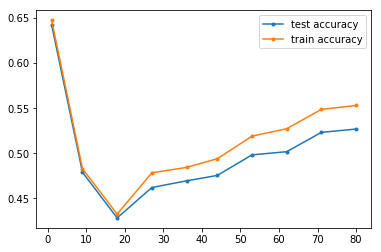

In [42]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=4), random_state=0)
train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)
mlTest.saveNpArray(train_acc4, "COVER-adaboost", descriptors="learning_rate-train_acc-depth4")
mlTest.saveNpArray(test_acc4, "COVER-adaboost", descriptors="learning_rate-test_acc-depth4")
mlTest.saveNpArray(param_vals4, "COVER-adaboost", descriptors="learning_rate-vals-depth4")

0.7999338624338626
1


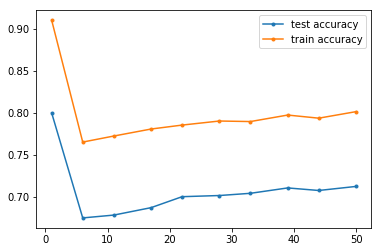

In [45]:
#param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.0001666666666666667), random_state=0)
#train_acc5, test_acc5, param_vals5 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
#print(np.max(test_acc5))
#print(param_vals3[np.argmax(test_acc5)])
#mlTest.plot_accuracy(train_acc5, test_acc5, param_vals5)
mlTest.saveNpArray(train_acc4, "COVER-adaboost", descriptors="learning_rate-train_acc-minImpurity")
mlTest.saveNpArray(test_acc4, "COVER-adaboost", descriptors="learning_rate-test_acc-minImpurity")
mlTest.saveNpArray(param_vals4, "COVER-adaboost", descriptors="learning_rate-vals-minImpurity")

Processing Param Val: 5
0.7999338624338626
1


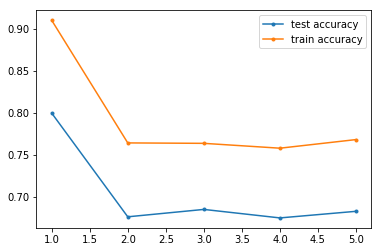

In [48]:
param = ('n_estimators', np.linspace(1, 5, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.0001666666666666667), random_state=0)
train_acc6, test_acc6, param_vals6 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc6))
print(param_vals3[np.argmax(test_acc6)])
mlTest.plot_accuracy(train_acc6, test_acc6, param_vals6)

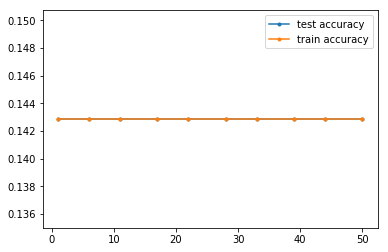

In [55]:
#param = ('n_estimators', np.linspace(1, 50, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.1666666666666667), random_state=0)
#train_acc7, test_acc7, param_vals7 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
#print(np.max(test_acc7))
#print(param_vals3[np.argmax(test_acc7)])
mlTest.plot_accuracy(train_acc7, test_acc7, param_vals7)

Processing Param Val: 2000
0.41150793650793654


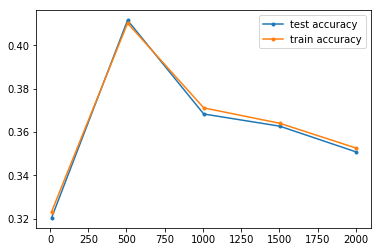

In [15]:
param = ('n_estimators', np.linspace(10, 2000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.1)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p1")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p1")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p1")

Processing Param Val: 2000
0.4154761904761905


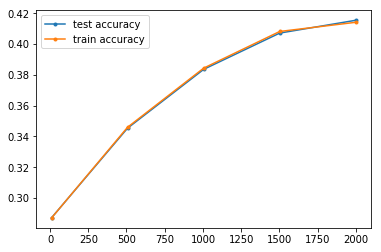

In [16]:
param = ('n_estimators', np.linspace(10, 2000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.01)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p01")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p01")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p01")

Processing Param Val: 2000
0.4354497354497354


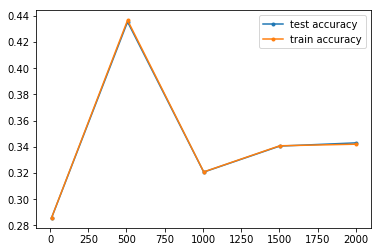

In [17]:
param = ('n_estimators', np.linspace(10, 2000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.001)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p001")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p001")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p001")

Processing Param Val: 2000
0.37215608465608463


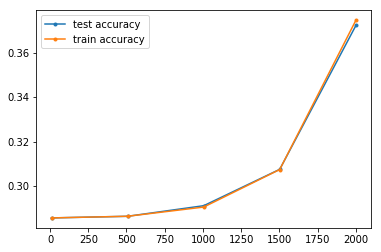

In [18]:
param = ('n_estimators', np.linspace(10, 2000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.0001)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p0001")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p0001")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p0001")

Processing Param Val: 2000
0.28578042328042325


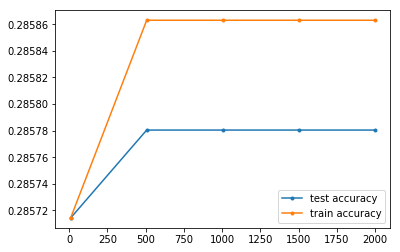

In [19]:
param = ('n_estimators', np.linspace(10, 2000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.00001)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p00001")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p00001")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p00001")

Processing Param Val: 5000
0.4354497354497354


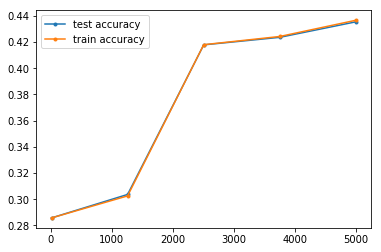

In [20]:
param = ('n_estimators', np.linspace(10, 5000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0, learning_rate=0.0001)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p0001")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p0001")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p0001")

Processing Param Val: 5000
0.8211640211640212


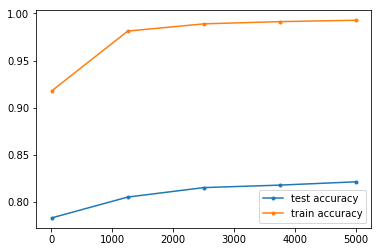

In [28]:
param = ('n_estimators', np.linspace(10, 5000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(min_impurity_decrease=0.0001666666666666667), learning_rate=0.0001)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
##print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p0001-deep")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p0001-deep")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p0001-deep")

In [ ]:
param = ('n_estimators', np.linspace(5000, 100000, num=5, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(min_impurity_decrease=0.0001666666666666667), learning_rate=0.0001)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=5)
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-adaboost", descriptors="learning_rate-train_acc-p0001-deep1")
mlTest.saveNpArray(test_acc, "COVER-adaboost", descriptors="learning_rate-test_acc-p0001-deep1")
mlTest.saveNpArray(param_vals, "COVER-adaboost", descriptors="learning_rate-vals-p0001-deep1")

In [12]:
clf = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(min_impurity_decrease=0.0001666666666666667), learning_rate=0.0001, n_estimators=1000)
clf.fit(X_train_val, y_train_val)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001666666666666667,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.0001, n_estimators=1000, random_state=None)

In [13]:
mlTest.saveObj(clf, 'COVER-ADA', descriptors='tuned')

In [23]:
clf = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(min_impurity_decrease=0.0001666666666666667), learning_rate=0.0001, n_estimators=1000)
train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, X_val=X_test, y_val=y_test, min_train_num=100, cross_val=False, num_step=5)
mlTest.plot_accuracy(train_acc, test_acc, train_samples)
mlTest.saveNpArray(train_acc, "COVER-AdaBoost", descriptors="tuned-train_acc")
mlTest.saveNpArray(test_acc, "COVER-AdaBoos", descriptors="tuned-test_acc")
mlTest.saveNpArray(train_samples, "COVER-AdaBoos", descriptors="tuned-vals")

100


KeyboardInterrupt: 

In [14]:
y_ = clf.predict(X_test)
m = metrics.precision_recall_fscore_support(y_test,y_)
m = np.concatenate(([['Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']], m), axis=0)
m = np.array(m).transpose()
from tabulate import tabulate
headers=['Class', 'Precision', 'Recall', 'F1 Score', 'Support']
print(tabulate(m, tablefmt="latex", floatfmt=".3f", headers=headers))

\begin{tabular}{lrrrr}
\hline
 Class             &   Precision &   Recall &   F1 Score &    Support \\
\hline
 Spruce-Fir        &       0.711 &    0.707 &      0.709 & 209680.000 \\
 Lodgepole Pine    &       0.815 &    0.655 &      0.727 & 281141.000 \\
 Ponderosa Pine    &       0.732 &    0.789 &      0.760 &  33594.000 \\
 Cottonwood/Willow &       0.223 &    0.937 &      0.360 &    587.000 \\
 Aspen             &       0.208 &    0.915 &      0.339 &   7333.000 \\
 Douglas-fir       &       0.479 &    0.794 &      0.597 &  15207.000 \\
 Krummholz         &       0.485 &    0.932 &      0.638 &  18350.000 \\
\hline
\end{tabular}


In [15]:
mlTest.saveObj(clf, 'COVER-ADA', descriptors='y_-tuned')

In [24]:
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0001666666666666667,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.0001, n_estimators=1000, random_state=None)

In [22]:
metrics.accuracy_score(y_test, y_)

0.6986827875283623

In [25]:
metrics.confusion_matrix(y_test, y_)

array([[148194,  40462,    366,      0,   3806,    899,  15953],
       [ 59049, 184246,   6720,     40,  21161,   7704,   2221],
       [    42,    618,  26500,   1560,    453,   4421,      0],
       [     0,      0,     27,    550,      0,     10,      0],
       [    51,    375,    102,      0,   6708,     96,      1],
       [    16,    226,   2443,    318,    132,  12072,      0],
       [  1083,    122,     22,      0,     14,      0,  17109]],
      dtype=int64)

SKIPPING ADABOOST FOR NOW

######################################

TESTING SVM
C value, RBF/linear kernel

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



0.48869047619047623
0.22311111111111112


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


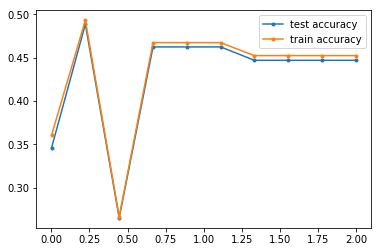

In [59]:
param = ('C', np.linspace(.001, 2, num=10))
classifier = svm.LinearSVC(random_state=0, max_iter=2000)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-LinearSVM", descriptors="C-train_acc")
mlTest.saveNpArray(test_acc, "COVER-LinearSVM", descriptors="C-test_acc")
mlTest.saveNpArray(param_vals, "COVER-LinearSVM", descriptors="C-vals")

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



0.48869047619047623
0.22311111111111112


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


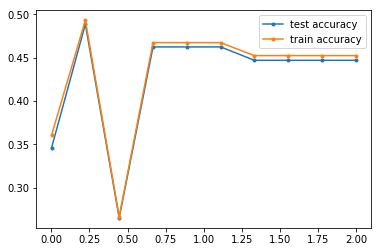

In [56]:
param = ('C', np.linspace(.001, .25, num=5))
classifier = svm.LinearSVC(random_state=0, max_iter=1000)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "COVER-LinearSVM", descriptors="C-train_acc")
# mlTest.saveNpArray(test_acc, "COVER-LinearSVM", descriptors="C-test_acc")
# mlTest.saveNpArray(param_vals, "COVER-LinearSVM", descriptors="C-vals")

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chunlok Lo\AppDat


0.537037037037037
0.001


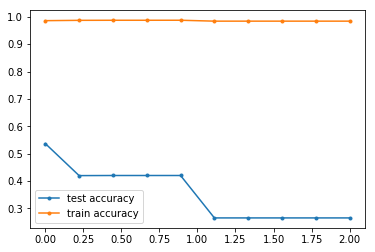

In [60]:
param = ('C', np.linspace(.001, 2, num=10))
classifier = svm.SVC(random_state=0, max_iter=1000)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy', folds=2)
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "COVER-SVM", descriptors="C-train_acc")
mlTest.saveNpArray(test_acc, "COVER-SVM", descriptors="C-test_acc")
mlTest.saveNpArray(param_vals, "COVER-SVM", descriptors="C-vals")

In [13]:
clf = svm.SVC(C=0.001, max_iter=4000, gamma='scale')
train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, min_train_num=500, folds=2, num_step=5)
mlTest.saveNpArray(train_acc, "COVER-SVM", descriptors="sample-train_acc")
mlTest.saveNpArray(test_acc, "COVER-SVM", descriptors="sample-test_acc")
mlTest.saveNpArray(train_samples, "COVER-SVM", descriptors="sample-vals")

500


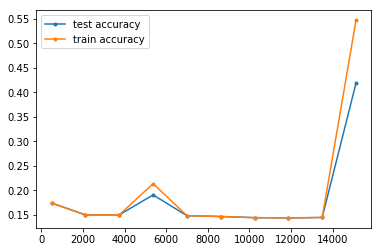

[500, 2124, 3748, 5373, 6997, 8622, 10246, 11871, 13495, 15120]


In [14]:
mlTest.plot_accuracy(train_acc, test_acc, train_samples)
print(train_samples)

In [ ]:
clf.train(X_train_vaL[0:8000], y_train_val[0:8000])
yclf.predict

[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [  53   47    0    0    0    0    0]
 [1051  360  198   11    0    0    0]
 [ 279    1    0    0    0    0    0]]
0.0
[[   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [  53   47    0    0    0    0    0]
 [1051  360  198   11    0    0    0]
 [ 279    1    0    0    0    0    0]]


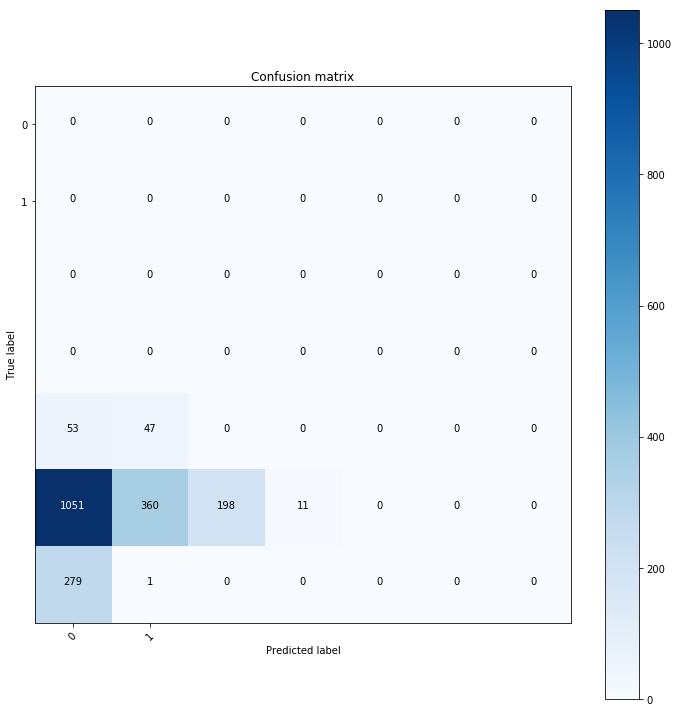

In [11]:
clf = svm.SVC(C=0.001, max_iter=4000, gamma='scale')
clf.fit(X_train_val[0:8000], y_train_val[0:8000])
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_train_val[8000:10000], y_train_val[8000:10000], classes=[0, 1])
print(accuracy)
print(cnf_matrix)

In [12]:
clf = svm.SVC(C=0.001, max_iter=1000, gamma='scale')
clf.fit(X_train_val, y_train_val)
mlTest.saveObj(clf, 'COVER-SVM', descriptors='tuned')

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [13]:
y_ = clf.predict(X_test)

In [14]:
mlTest.saveObj(X_test, 'COVER-SVM', descriptors='tuned-x_test')
mlTest.saveObj(y_, 'COVER-SVM', descriptors='tuned-y_predict')

In [ ]:
#clf = svm.SVC(C=0.001, max_iter=1000, gamma='scale')
#clf.fit(X_train_val, y_train_val)
#cnf, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [16]:
accuracy = metrics.accuracy_score(y_test, y_)
print(accuracy)

0.7063591639394089


In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_)
print(cnf_matrix)

[[135218  58153    155      0   4150    288  11716]
 [ 39710 205726   6086      4  19680   7753   2182]
 [    74   1745  19763   1828    434   9750      0]
 [     0      6      6    510      0     65      0]
 [    42    139    124      0   6919    109      0]
 [    51    393    316    244    159  14044      0]
 [   490    312      0      0      5      0  17543]]


In [18]:
mlTest.saveNpArray(cnf_matrix, "COVER-SVM", descriptors="cnf_matrix")

In [15]:
# clf = svm.SVC(C=0.001, max_iter=4000, gamma='scale')
# clf.fit(X_train_val, y_train_val)
#y_ = clf.predict(X_test)
m = metrics.precision_recall_fscore_support(y_test,y_)
m = np.concatenate(([['Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']], m), axis=0)
m = np.array(m).transpose()
from tabulate import tabulate
headers=['Class', 'Precision', 'Recall', 'F1 Score', 'Support']
print(tabulate(m, tablefmt="latex", floatfmt=".3f", headers=headers))

\begin{tabular}{lrrrr}
\hline
 Class             &   Precision &   Recall &   F1 Score &    Support \\
\hline
 Spruce-Fir        &       0.770 &    0.645 &      0.702 & 209680.000 \\
 Lodgepole Pine    &       0.772 &    0.732 &      0.751 & 281141.000 \\
 Ponderosa Pine    &       0.747 &    0.588 &      0.658 &  33594.000 \\
 Cottonwood/Willow &       0.197 &    0.869 &      0.321 &    587.000 \\
 Aspen             &       0.221 &    0.944 &      0.358 &   7333.000 \\
 Douglas-fir       &       0.439 &    0.924 &      0.595 &  15207.000 \\
 Krummholz         &       0.558 &    0.956 &      0.705 &  18350.000 \\
\hline
\end{tabular}


In [22]:
y_train_val

268110    3
543431    7
216155    7
238320    3
579797    6
235440    6
181607    1
268649    4
272728    4
543679    7
305081    2
251068    6
1971      5
9251      7
303762    3
246821    5
251929    6
6128      4
170866    1
580748    3
242461    6
70260     2
12579     4
4234      4
530858    1
19060     5
292217    6
4345      4
368636    7
400779    5
         ..
176313    5
5372      4
4688      4
438639    1
520315    2
177141    5
2366      5
13001     5
2801      6
423134    1
35194     1
527471    1
292631    6
319975    3
260637    4
3898      4
344086    7
367284    3
502983    7
474136    7
283098    6
277179    3
392717    2
7963      6
538201    2
448129    1
49007     2
533245    7
218190    5
291595    4
Name: Cover_Type, Length: 15120, dtype: int64